# Problem statement:Fare Amount

### Step1:Import the packages
### numpy,pandas,matplotlib,seaborn,sklearn,train test split,metrics

In [1]:
#Basic and most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Data processing functions   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
#Regressor
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#Model evaluation tools
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_squared_log_error
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Step2: Load the dataset

In [2]:
df=pd.read_csv("C:/Users/Admin/Desktop/TaxiFare1.csv")

## Step3: Data Analysis
## a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [5]:
df.shape

(50000, 8)

In [6]:
df.dtypes.value_counts()

float64    5
object     2
int64      1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,50000,3597,26:00.0,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,50000.0,NaN,NaN,NaN,11.364171,9.685557,-5.0,6.0,8.5,12.5,200.0
date_time_of_pickup,50000,49555,2011-09-03 01:30:00 UTC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude_of_pickup,50000.0,NaN,NaN,NaN,-72.509756,10.39386,-75.423848,-73.992062,-73.98184,-73.967148,40.783472
latitude_of_pickup,50000.0,NaN,NaN,NaN,39.933759,6.224857,-74.006893,40.73488,40.752678,40.76736,401.083332
longitude_of_dropoff,50000.0,NaN,NaN,NaN,-72.504616,10.40757,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,NaN,NaN,NaN,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.41519
no_of_passenger,50000.0,NaN,NaN,NaN,1.66784,1.289195,0.0,1.0,1.0,2.0,6.0


## 4.Data Cleaning
#### should check if the dataset has any missing values
#### check if there are any duplicate values, if so drop it
#### should replace '0' with the respective attribute mean value

In [10]:
df.isnull().sum()
# as there are no missing values we should check if the dataset has zero values

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [11]:
duplicate=df.duplicated()
duplicate.sum()

0

In [12]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [13]:
df.drop(['unique_id'],axis=1,inplace=True)

In [14]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup']).astype('int64')

In [15]:
df['amount']=df['amount'].astype('int64')

In [16]:
df.dtypes

amount                    int64
date_time_of_pickup       int64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [17]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4,1245086781000000000,-73.844311,40.721319,-73.841610,40.712278,1
1,16,1262710336000000000,-74.016048,40.711303,-73.979268,40.782004,1
2,5,1313627700000000000,-73.982738,40.761270,-73.991242,40.750562,2
3,7,1334982642000000000,-73.987130,40.733143,-73.991567,40.758092,1
4,5,1268121060000000000,-73.968095,40.768008,-73.956655,40.783762,1


In [18]:
print(df['amount'].value_counts()[0])
print(df['longitude_of_pickup'].value_counts()[0])
print(df['latitude_of_pickup'].value_counts()[0])
print(df['longitude_of_dropoff'].value_counts()[0])
print(df['latitude_of_dropoff'].value_counts()[0])
print(df['no_of_passenger'].value_counts()[0])

4
955
955
958
955
165


In [19]:
print(df['amount'].unique())
print(df['latitude_of_pickup'].unique())
print(df['latitude_of_dropoff'].unique())
print(df['longitude_of_pickup'].unique())
print(df['longitude_of_pickup'].unique())
print(df['no_of_passenger'].unique())

[  4  16   5   7  12   9   8  10  11   6  22  31  18  58  17   3  25  15
  34  13  24  14  52  35  32  19  49  21  23  27  26  42  30   2  57  43
  20  33  36  29  56  28  38  66  45  53  54  40  48 180  39  55 165  70
  65  46  77  -2  63  50  37  79   0  41  69  85  51  44 128  76  59  95
  88  47  87  75  61 104  80  96  -3 108  82  73  78  71  62  67 120  60
 100 135 110 149  68 200  72  64 136  74  93  84  89  91  92  -5 143  86
 103 160  90]
[40.721319 40.711303 40.76127  ... 40.719868 40.739494 40.768434]
[40.712278   40.782004   40.750562   ... 40.705993   40.76059723
 40.763805  ]
[-73.844311 -74.016048 -73.982738 ... -73.998573 -73.946062 -73.932603]
[-73.844311 -74.016048 -73.982738 ... -73.998573 -73.946062 -73.932603]
[1 2 3 6 5 4 0]


In [20]:
# replcaing all 0's with their respective median or mean values

In [21]:
median1=df['amount'].median()
df['amount'].replace(0,median1,inplace=True)
median2=df['latitude_of_pickup'].median()
df['latitude_of_pickup'].replace(0,median2,inplace=True)
median3=df['latitude_of_dropoff'].median()
df['latitude_of_dropoff'].replace(0,median3,inplace=True)
median4=df['no_of_passenger'].median()
df['no_of_passenger'].replace(0,median4,inplace=True)
median5=df['longitude_of_pickup'].median()
df['longitude_of_pickup'].replace(0,median5,inplace=True)
median6=df['longitude_of_pickup'].median()
df['longitude_of_pickup'].replace(0,median6,inplace=True)

In [22]:
df['amount']=df['amount'].abs()
print(df['amount'].unique())
print(df['latitude_of_pickup'].unique())
print(df['latitude_of_dropoff'].unique())
print(df['longitude_of_pickup'].unique())
print(df['longitude_of_pickup'].unique())
print(df['no_of_passenger'].unique())
# no zero values

[  4  16   5   7  12   9   8  10  11   6  22  31  18  58  17   3  25  15
  34  13  24  14  52  35  32  19  49  21  23  27  26  42  30   2  57  43
  20  33  36  29  56  28  38  66  45  53  54  40  48 180  39  55 165  70
  65  46  77  63  50  37  79  41  69  85  51  44 128  76  59  95  88  47
  87  75  61 104  80  96 108  82  73  78  71  62  67 120  60 100 135 110
 149  68 200  72  64 136  74  93  84  89  91  92 143  86 103 160  90]
[40.721319 40.711303 40.76127  ... 40.719868 40.739494 40.768434]
[40.712278   40.782004   40.750562   ... 40.705993   40.76059723
 40.763805  ]
[-73.844311 -74.016048 -73.982738 ... -73.998573 -73.946062 -73.932603]
[-73.844311 -74.016048 -73.982738 ... -73.998573 -73.946062 -73.932603]
[1 2 3 6 5 4]


# Step5: Data Visulization

array([[<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'date_time_of_pickup'}>,
        <Axes: title={'center': 'longitude_of_pickup'}>],
       [<Axes: title={'center': 'latitude_of_pickup'}>,
        <Axes: title={'center': 'longitude_of_dropoff'}>,
        <Axes: title={'center': 'latitude_of_dropoff'}>],
       [<Axes: title={'center': 'no_of_passenger'}>, <Axes: >, <Axes: >]],
      dtype=object)

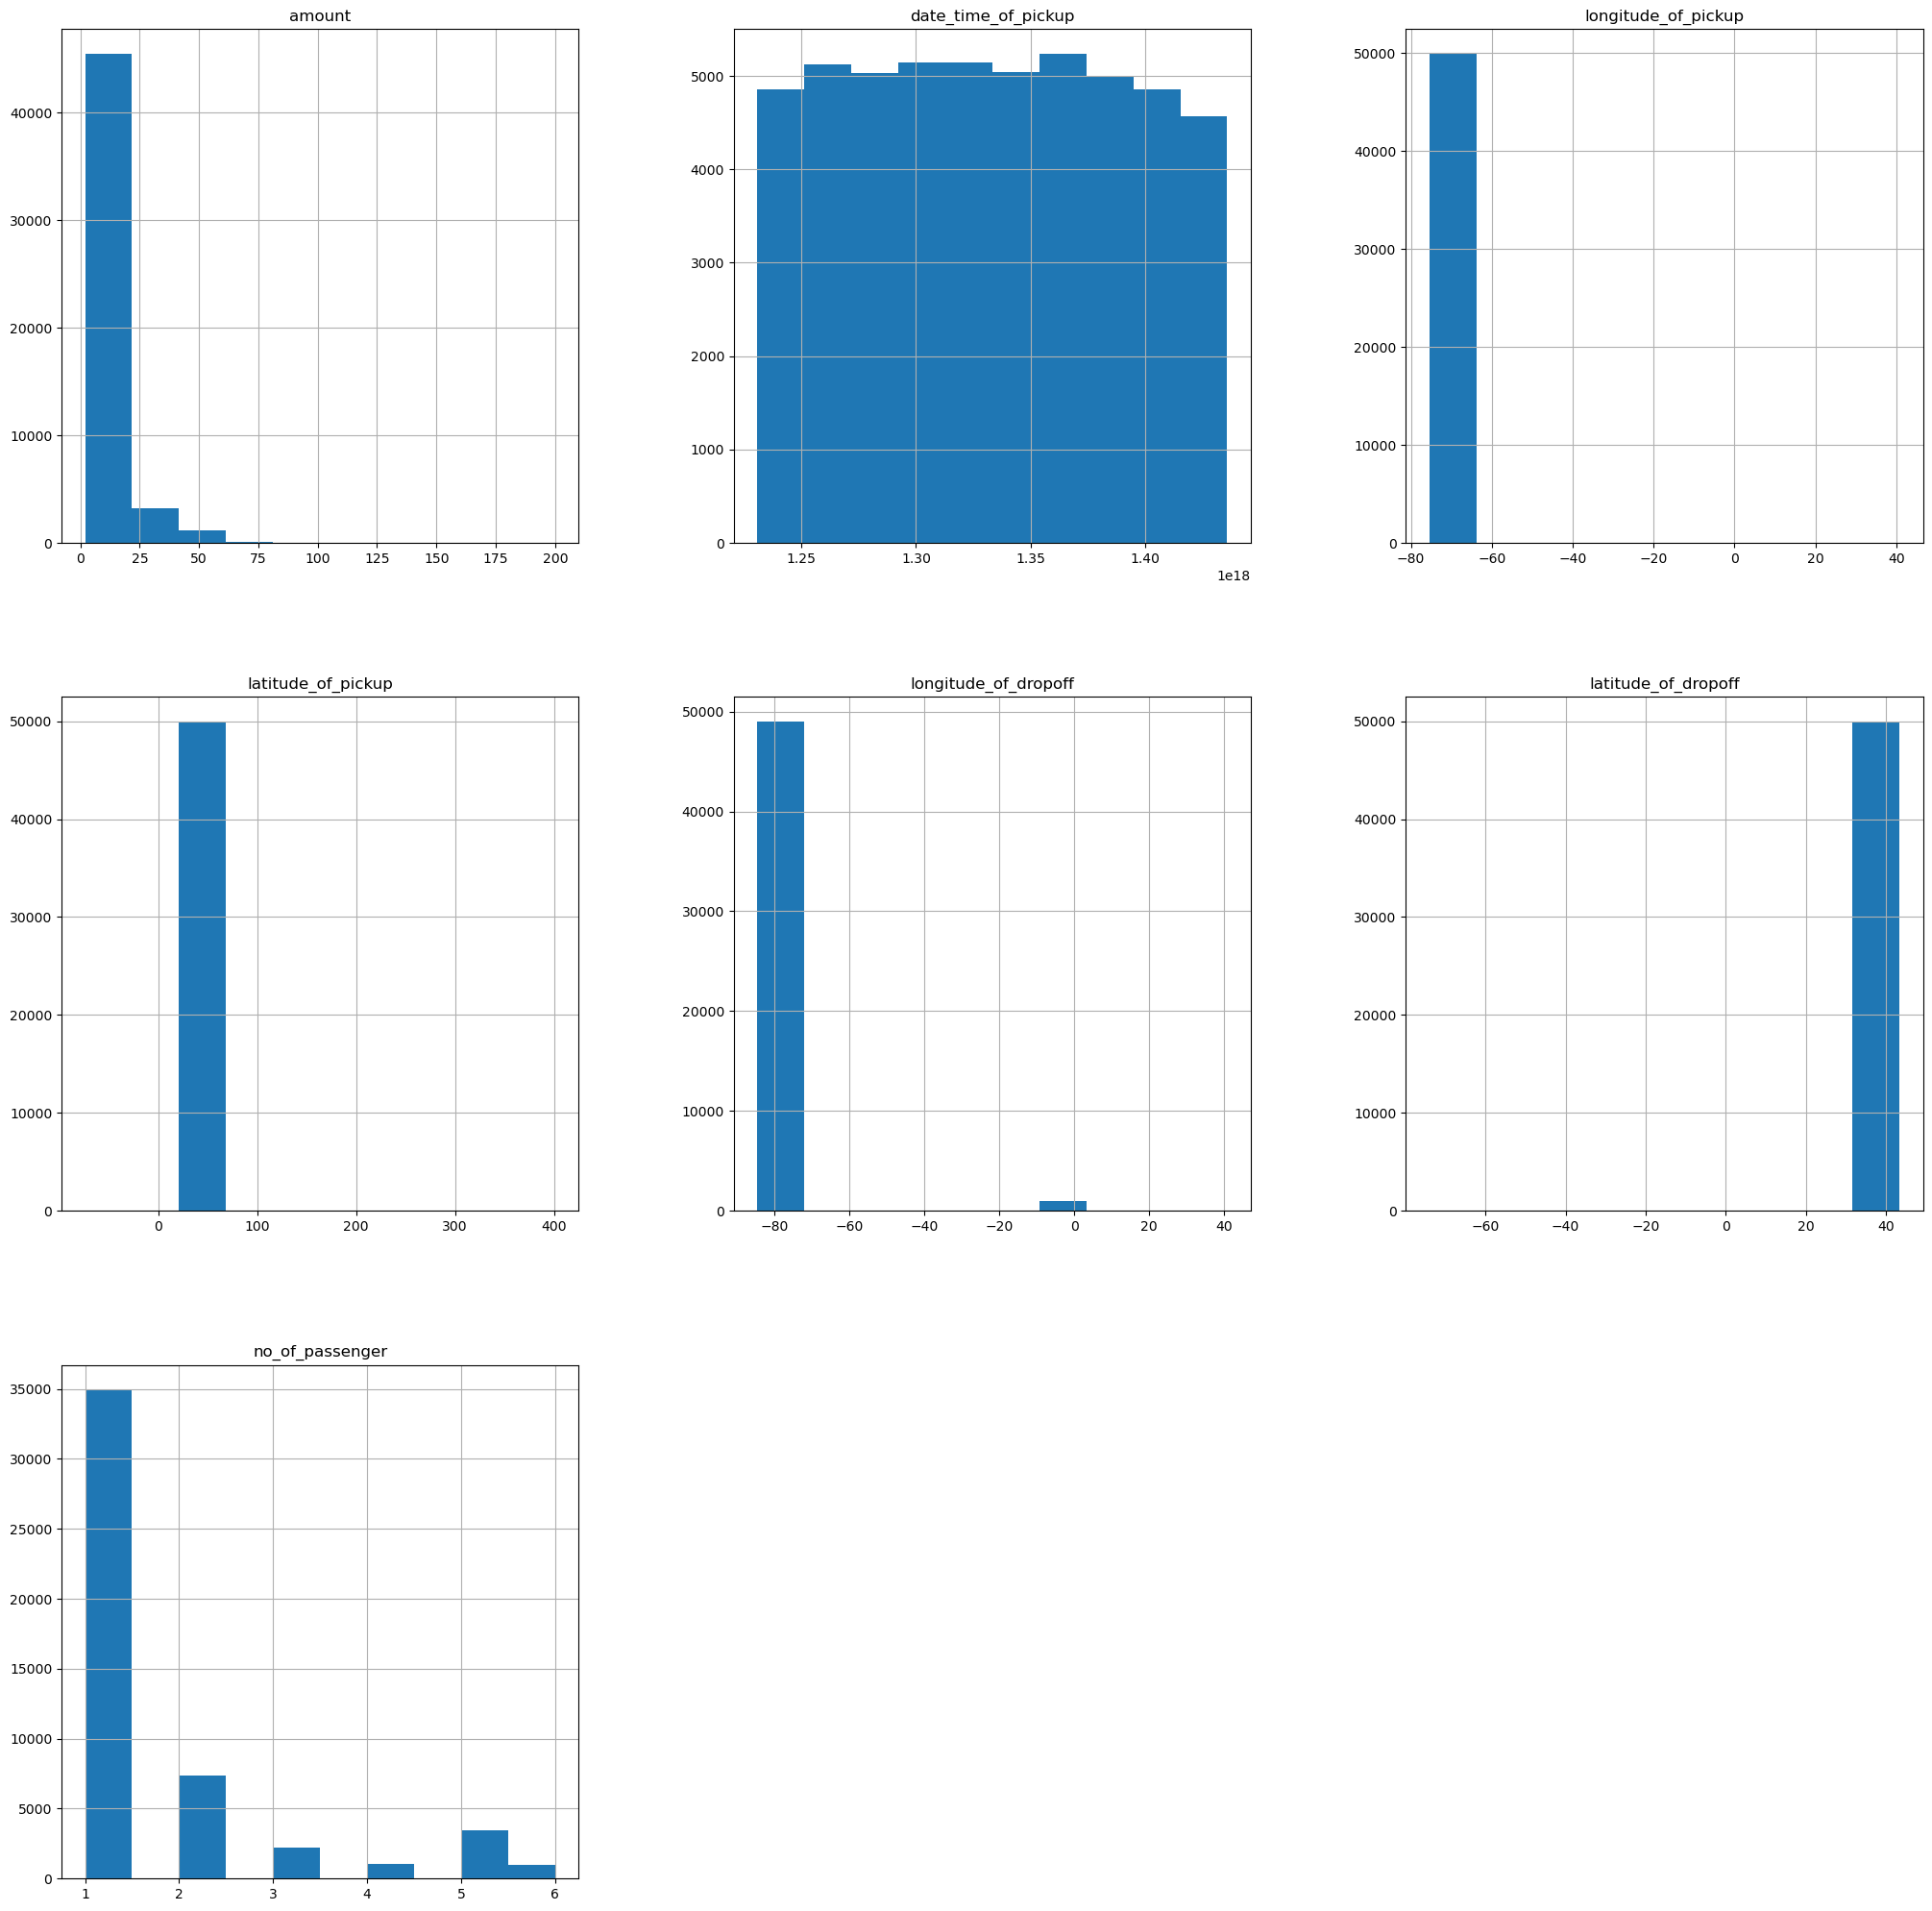

In [23]:
df.hist(figsize=(25,25))

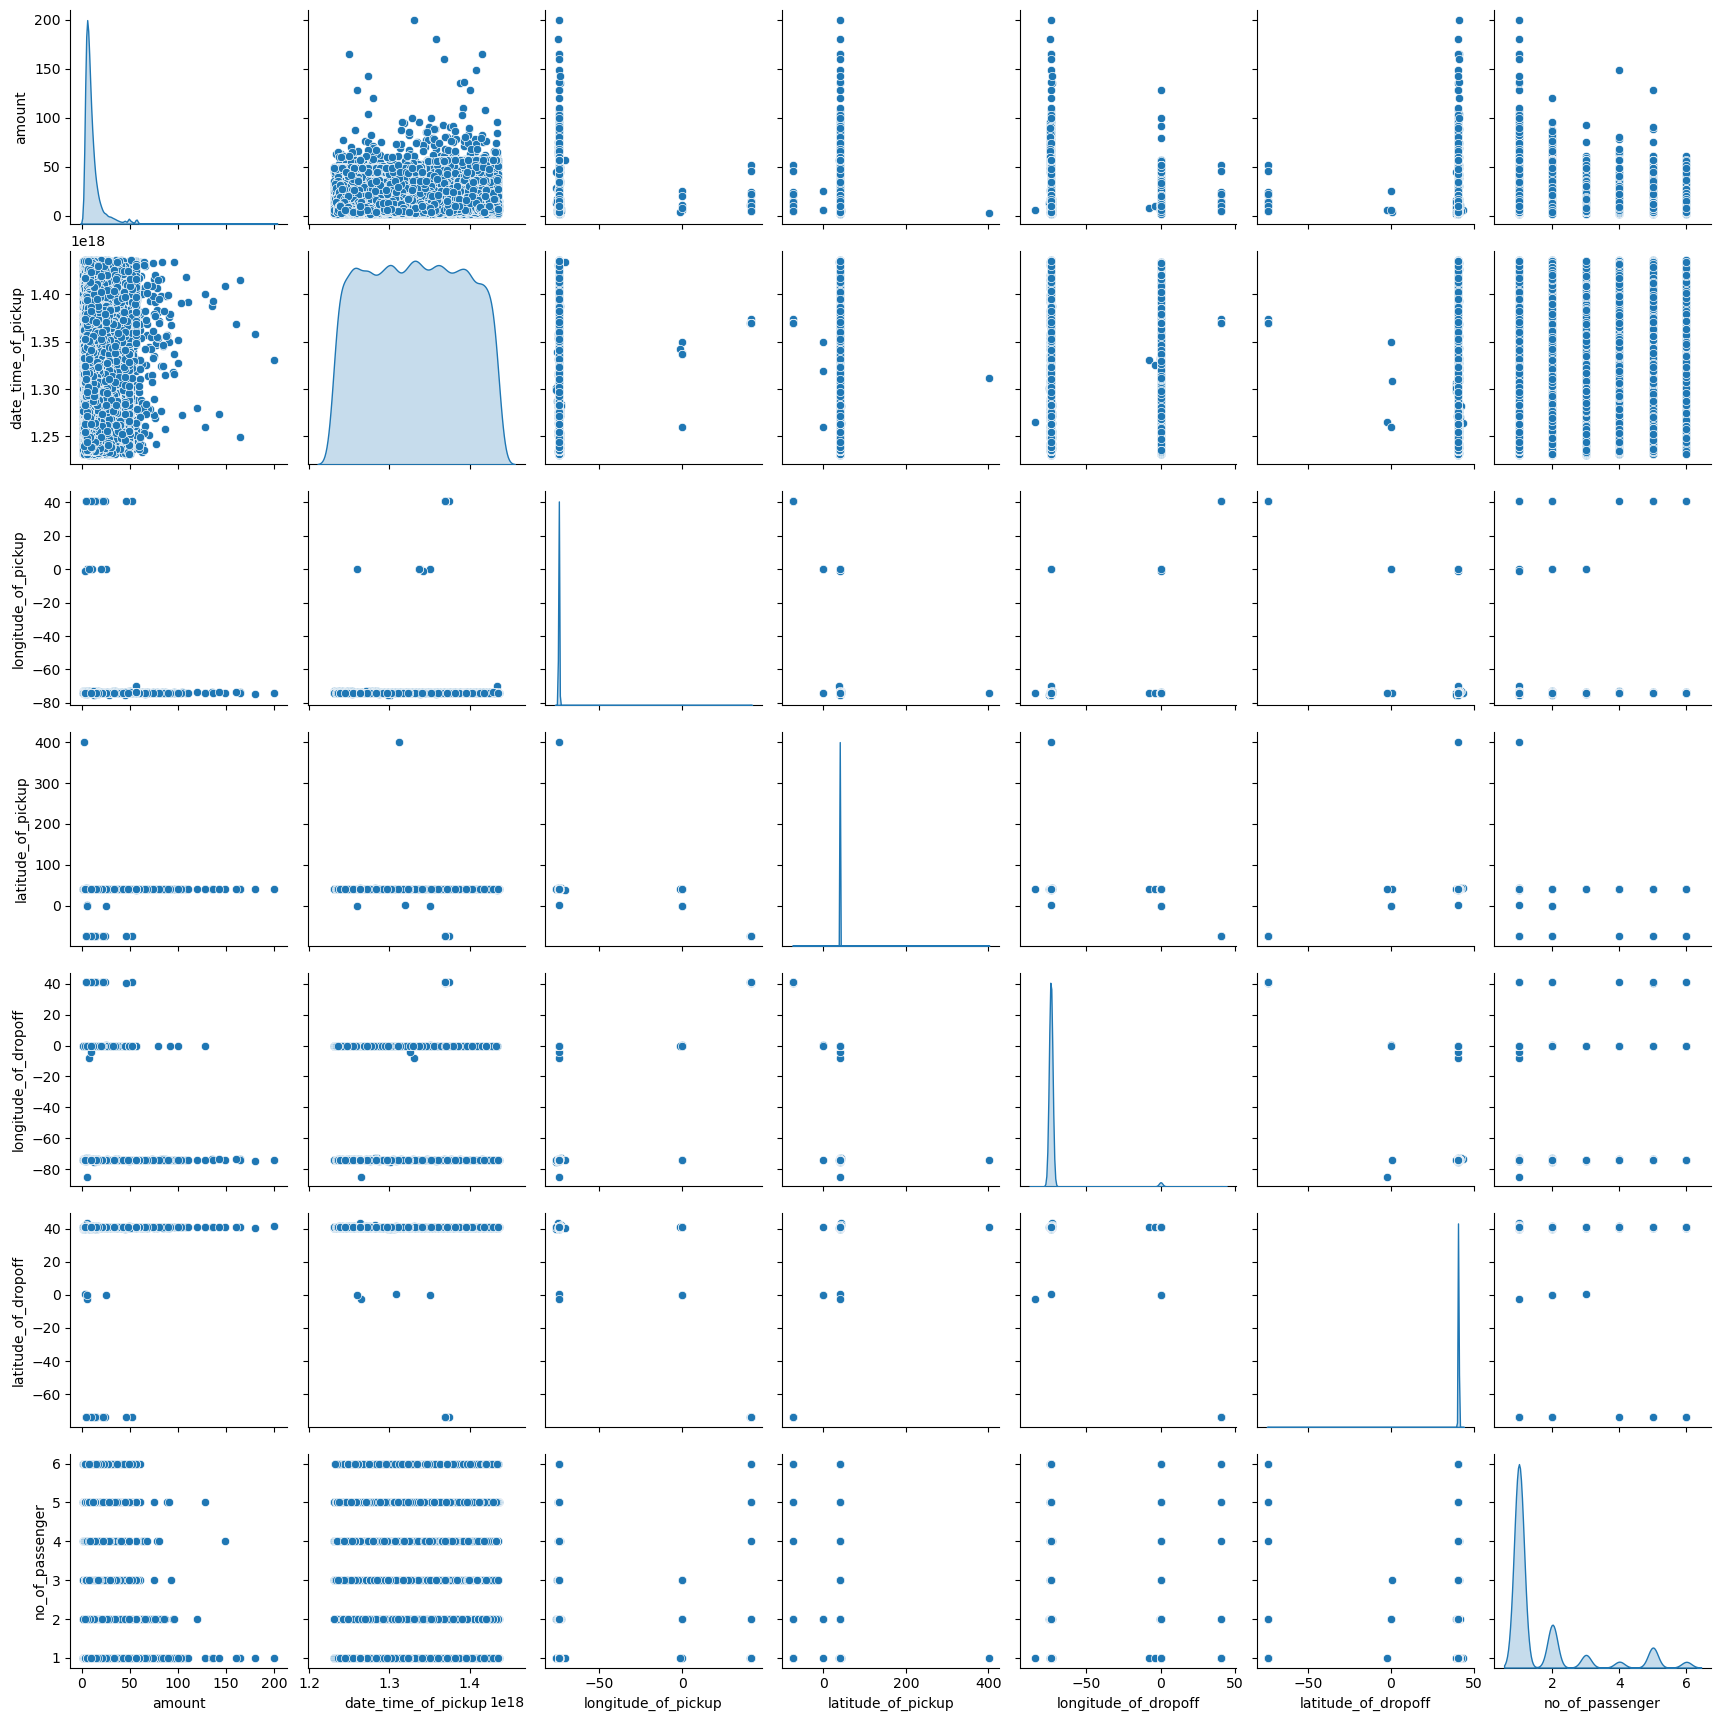

In [24]:
sns.pairplot(df,diag_kind = "kde")

<Axes: xlabel='no_of_passenger', ylabel='count'>

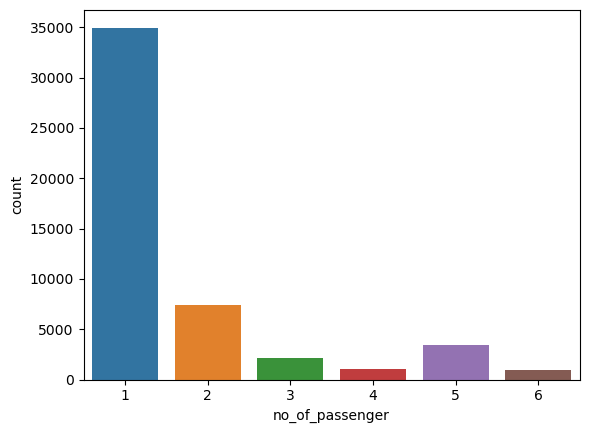

In [25]:
sns.countplot(x='no_of_passenger',data=df)

<Axes: xlabel='amount'>

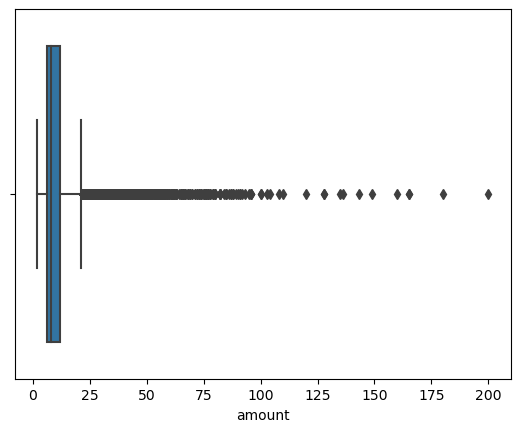

In [26]:
sns.boxplot(x='amount',data=df)

<Axes: xlabel='date_time_of_pickup'>

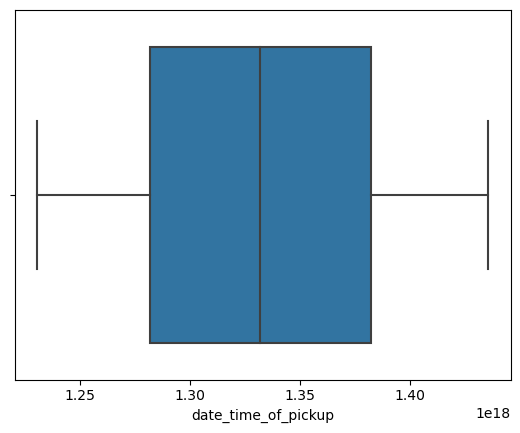

In [27]:
sns.boxplot(x='date_time_of_pickup',data=df)

<Axes: xlabel='longitude_of_pickup'>

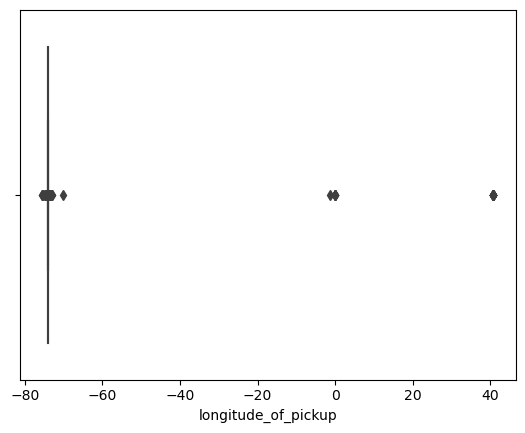

In [28]:
sns.boxplot(x='longitude_of_pickup',data=df)

<Axes: xlabel='longitude_of_dropoff'>

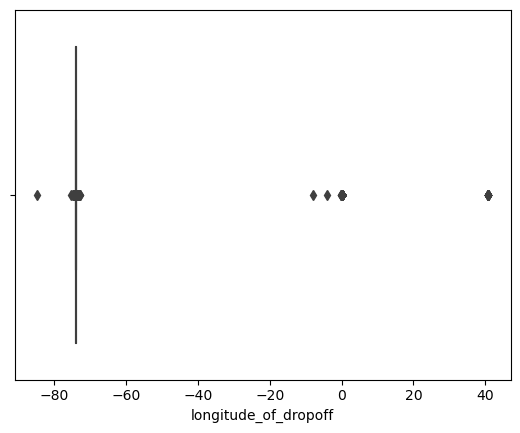

In [29]:
sns.boxplot(x='longitude_of_dropoff',data=df)

<Axes: xlabel='latitude_of_pickup'>

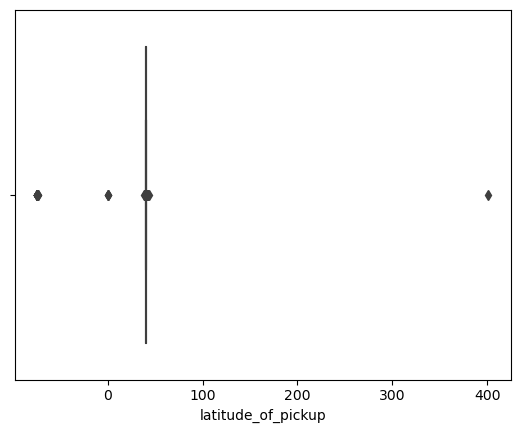

In [30]:
sns.boxplot(x='latitude_of_pickup',data=df)

<Axes: xlabel='latitude_of_dropoff'>

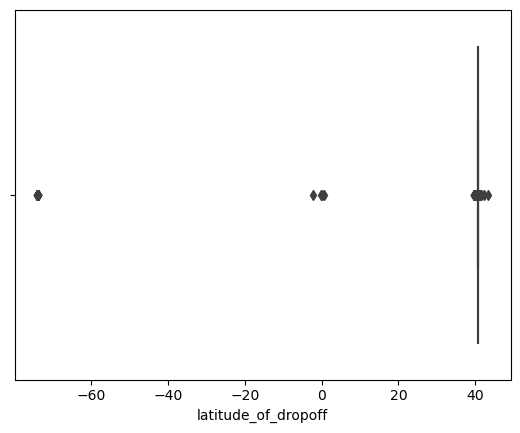

In [31]:
sns.boxplot(x='latitude_of_dropoff',data=df)

<Axes: xlabel='no_of_passenger'>

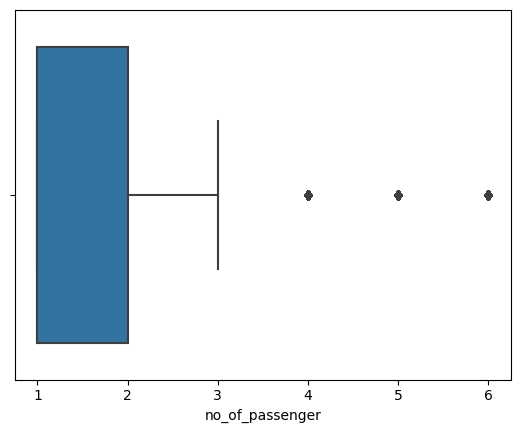

In [32]:
sns.boxplot(x='no_of_passenger',data=df)

In [33]:
# to remove outliers 

In [34]:
def remove_outlier(col):
    sorted(col)
    q1,q3= col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range
lowamount,uppamount = remove_outlier(df['amount'])
df['amount'] = np.where(df['amount']>uppamount,uppamount,df['amount'])
df['amount'] = np.where(df['amount']<lowamount,lowamount,df['amount'])

def remove_outlier(col):
    sorted(col)
    q1,q3= col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range
lowdate_time_of_pickup,uppdate_time_of_pickup = remove_outlier(df['date_time_of_pickup'])
df['date_time_of_pickup'] = np.where(df['date_time_of_pickup']>uppdate_time_of_pickup,uppdate_time_of_pickup,df['date_time_of_pickup'])
df['date_time_of_pickup'] = np.where(df['date_time_of_pickup']<lowdate_time_of_pickup,lowdate_time_of_pickup,df['date_time_of_pickup'])

def remove_outlier(col):
    sorted(col)
    q1,q3= col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range
lowlongitude_of_pickup,upplongitude_of_pickup = remove_outlier(df['longitude_of_pickup'])
df['longitude_of_pickup'] = np.where(df['longitude_of_pickup']>upplongitude_of_pickup,upplongitude_of_pickup,df['longitude_of_pickup'])
df['longitude_of_pickup'] = np.where(df['longitude_of_pickup']<lowlongitude_of_pickup,lowlongitude_of_pickup,df['longitude_of_pickup'])

<Axes: xlabel='amount'>

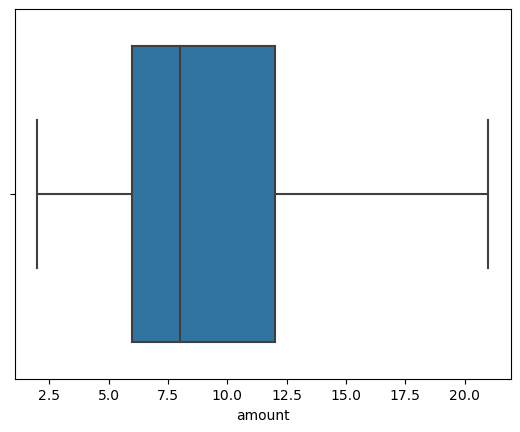

In [35]:
sns.boxplot(x='amount',data=df)

<Axes: xlabel='date_time_of_pickup'>

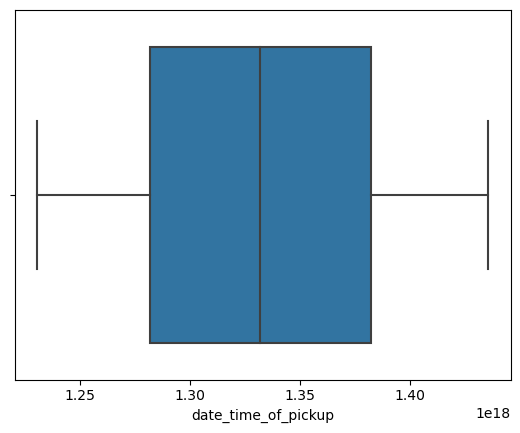

In [36]:
sns.boxplot(x='date_time_of_pickup',data=df)

<Axes: xlabel='longitude_of_pickup'>

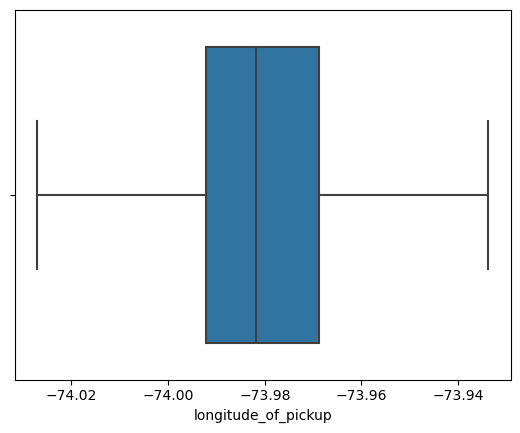

In [37]:
sns.boxplot(x='longitude_of_pickup',data=df)

In [38]:
def remove_outlier(col):
    sorted(col)
    q1,q3= col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range
lowlongitude_of_dropoff,upplongitude_of_dropoff = remove_outlier(df['longitude_of_dropoff'])
df['longitude_of_dropoff'] = np.where(df['longitude_of_dropoff']>upplongitude_of_dropoff,upplongitude_of_dropoff,df['longitude_of_dropoff'])
df['longitude_of_dropoff'] = np.where(df['longitude_of_dropoff']<lowlongitude_of_dropoff,lowlongitude_of_dropoff,df['longitude_of_dropoff'])

def remove_outlier(col):
    sorted(col)
    q1,q3= col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range
lowlatitude_of_pickup,upplatitude_of_pickup = remove_outlier(df['latitude_of_pickup'])
df['latitude_of_pickup'] = np.where(df['latitude_of_pickup']>upplatitude_of_pickup,upplatitude_of_pickup,df['latitude_of_pickup'])
df['latitude_of_pickup'] = np.where(df['latitude_of_pickup']<lowlatitude_of_pickup,lowlatitude_of_pickup,df['latitude_of_pickup'])

def remove_outlier(col):
    sorted(col)
    q1,q3= col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range
lowlatitude_of_dropoff,upplatitude_of_dropoff = remove_outlier(df['latitude_of_dropoff'])
df['latitude_of_dropoff'] = np.where(df['latitude_of_dropoff']>upplatitude_of_dropoff,upplatitude_of_dropoff,df['latitude_of_dropoff'])
df['latitude_of_dropoff'] = np.where(df['latitude_of_dropoff']<lowlatitude_of_dropoff,lowlatitude_of_dropoff,df['latitude_of_dropoff'])

<Axes: xlabel='longitude_of_dropoff'>

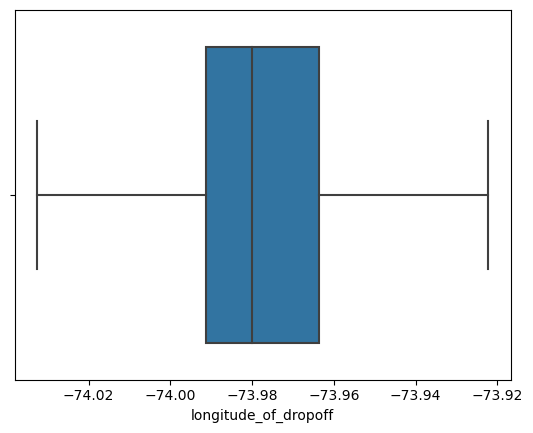

In [39]:
sns.boxplot(x='longitude_of_dropoff',data=df)

<Axes: xlabel='latitude_of_pickup'>

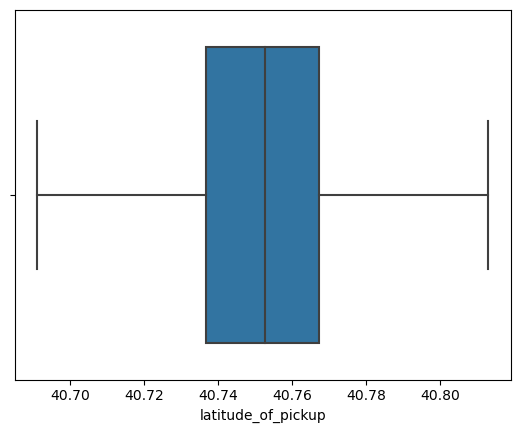

In [40]:
sns.boxplot(x='latitude_of_pickup',data=df)

<Axes: xlabel='latitude_of_dropoff'>

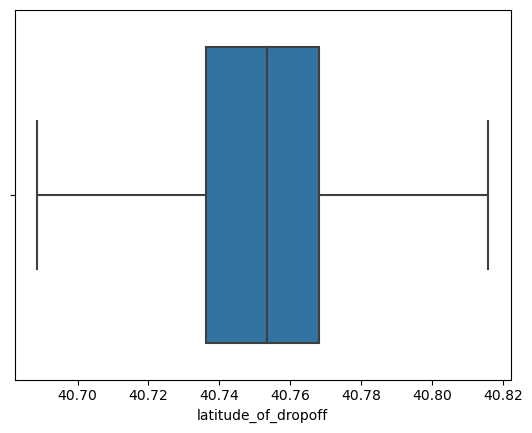

In [41]:
sns.boxplot(x='latitude_of_dropoff',data=df)

<Axes: xlabel='no_of_passenger'>

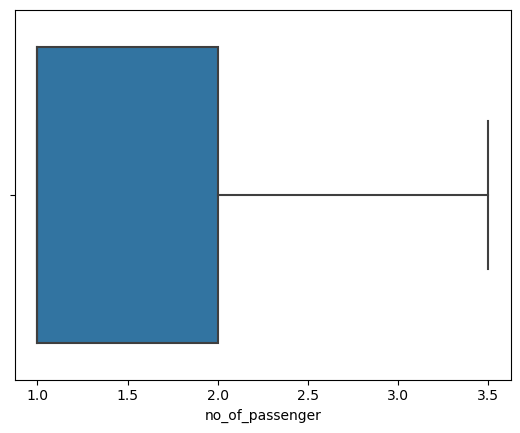

In [42]:
def remove_outlier(col):
    sorted(col)
    q1,q3= col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range
lowno_of_passenger,uppno_of_passenger = remove_outlier(df['no_of_passenger'])
df['no_of_passenger'] = np.where(df['no_of_passenger']>uppno_of_passenger,uppno_of_passenger,df['no_of_passenger'])
df['no_of_passenger'] = np.where(df['no_of_passenger']<lowno_of_passenger,lowno_of_passenger,df['no_of_passenger'])
sns.boxplot(x='no_of_passenger',data=df)

# Step6: Feature Selection

In [43]:
corr = df.corr()
corr

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.172461,0.136523,-0.114107,0.217382,-0.121422,0.017821
date_time_of_pickup,0.172461,1.000000,0.012827,-0.007739,0.011998,-0.003473,-0.008133
longitude_of_pickup,0.136523,0.012827,1.000000,0.461991,0.329789,0.210131,-0.005251
latitude_of_pickup,-0.114107,-0.007739,0.461991,1.000000,0.175784,0.459411,-0.003985
longitude_of_dropoff,0.217382,0.011998,0.329789,0.175784,1.000000,0.387587,-0.010472
latitude_of_dropoff,-0.121422,-0.003473,0.210131,0.459411,0.387587,1.000000,-0.005169
no_of_passenger,0.017821,-0.008133,-0.005251,-0.003985,-0.010472,-0.005169,1.000000


<Axes: >

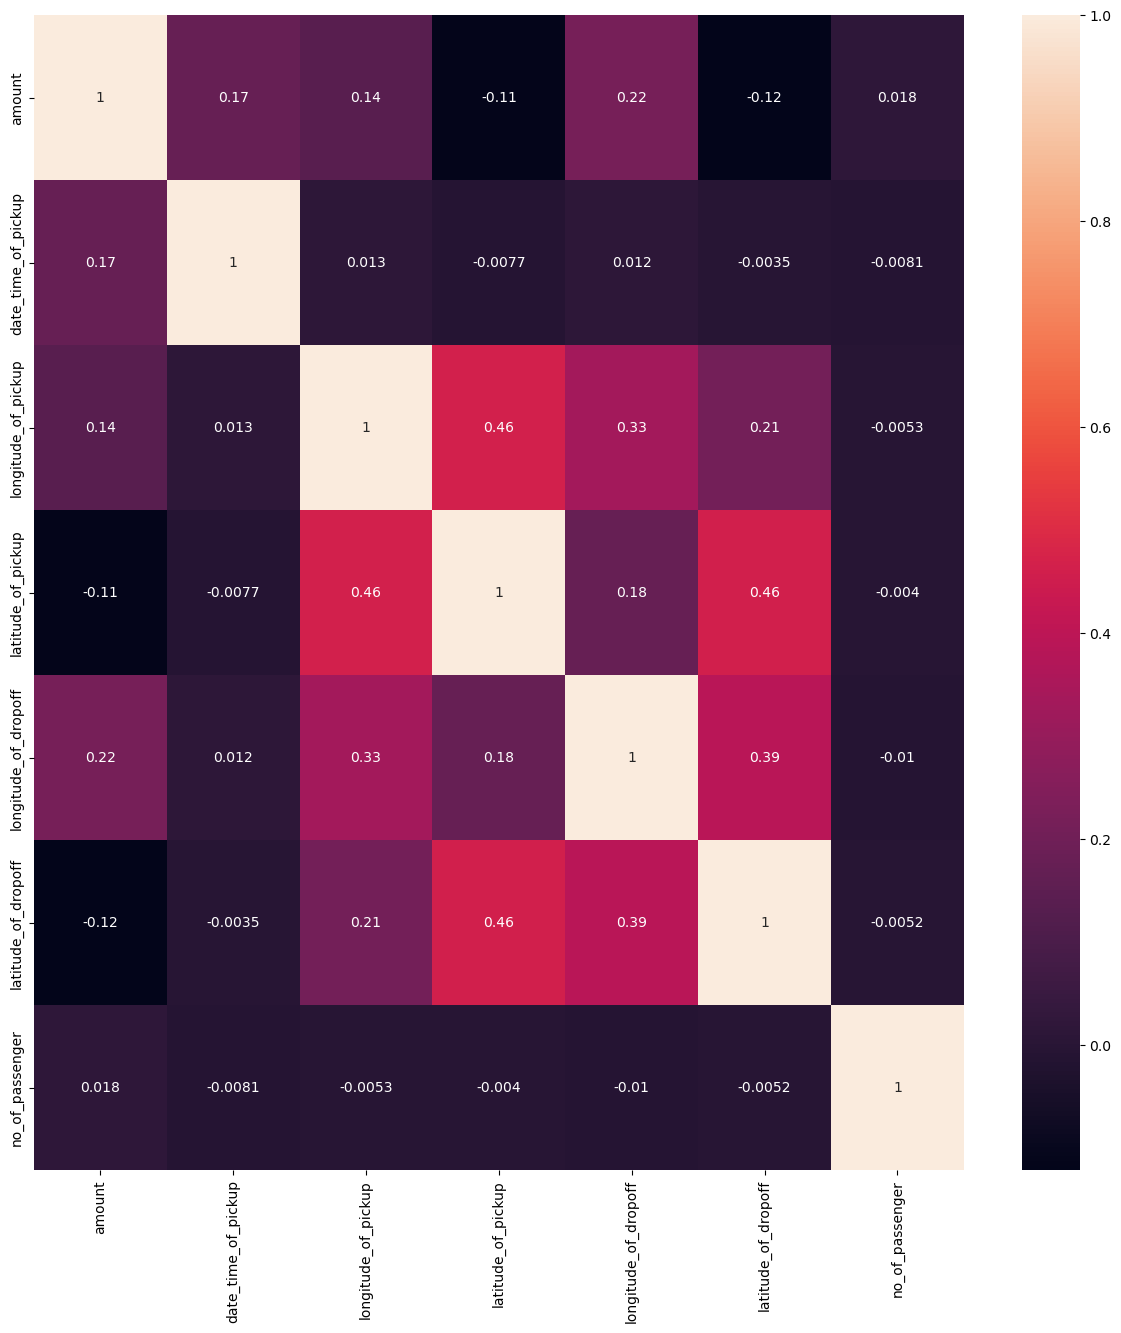

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

# Step7: Split the Data Frame into X and y

In [45]:
### split data
y = df['amount']
x=df.drop(['amount'],axis=1)

In [46]:
# slpit into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Step8: Classification Algorithms
- Decision Tree
- Random Forest
- Bagging 
- AdaBoost
- Linear Regression
- GradientBoosting
- SVM

# 8.1 DecisionTreeRegressor

In [47]:
# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(max_depth=18)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=18)

In [48]:
# Evaluate the Decision Tree Regressor model
dt_predictions = dt_model.predict(x_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_msle = mean_squared_log_error(y_test, dt_predictions)

print('Decision Tree Regressor:')
print('Model_Score_train:',dt_model.score(x_train,y_train))
print('Model_Score_test:',dt_model.score(x_test,y_test))
print('RMSE:', dt_rmse)
print('R2 Score:', dt_r2)
print('MAE:',dt_mae)
print('MSLE:',dt_msle)

Decision Tree Regressor:
Model_Score_train: 0.829759545697402
Model_Score_test: 0.6218175315846253
RMSE: 3.268683085148231
R2 Score: 0.6218175315846253
MAE: 2.1809906066570526
MSLE: 0.10461449025380086


# 8.2 Random Forest

In [49]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor() 
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
# Evaluate the Random Forest Regressor model
rf_predictions = rf_model.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_msle = mean_squared_log_error(y_test, rf_predictions)

print('Random Forest Regressor:')
print('Model_Score_train:',rf_model.score(x_train,y_train))
print('Model_Score_test:',rf_model.score(x_test,y_test))
print('RMSE:', rf_rmse)
print('R2 Score:', rf_r2)
print('MAE:',rf_mae)
print('MSLE:',rf_msle)

Random Forest Regressor:
Model_Score_train: 0.967762012127524
Model_Score_test: 0.7649547514624488
RMSE: 2.5769017337662543
R2 Score: 0.7649547514624488
MAE: 1.6513733333333334
MSLE: 0.0627116318211361


# 8.3 Bagging Regressor

In [51]:
# Train the Bagging Regressor model
b_model = BaggingRegressor()
b_model.fit(x_train, y_train)

BaggingRegressor()

In [52]:
# Evaluate the BaggingRegressor model
b_predictions = b_model.predict(x_test)
b_rmse = np.sqrt(mean_squared_error(y_test, b_predictions))
b_r2 = r2_score(y_test, b_predictions)
b_mae = mean_absolute_error(y_test, b_predictions)
b_msle = mean_squared_log_error(y_test, b_predictions)

print('Bagging Regressor:')
print('Model_Score_train:',b_model.score(x_train,y_train))
print('Model_Score_test:',b_model.score(x_test,y_test))
print('RMSE:', b_rmse)
print('R2 Score:', b_r2)
print('MAE:',b_mae)
print('MSLE:',b_msle)


Bagging Regressor:
Model_Score_train: 0.955367228555929
Model_Score_test: 0.7434221221080016
RMSE: 2.6923512854834613
R2 Score: 0.7434221221080016
MAE: 1.7435433333333334
MSLE: 0.06918752417293948


# 8.4 AdaBoost

In [53]:
# Train the AdaBoost Regressor model
ada_model = AdaBoostRegressor( estimator=b_model)
ada_model.fit(x_train, y_train)

AdaBoostRegressor(estimator=BaggingRegressor())

In [54]:
# Evaluate the AdaBoost Regressor model
ada_predictions = ada_model.predict(x_test)
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_predictions))
ada_r2 = r2_score(y_test, ada_predictions)
ada_mae = mean_absolute_error(y_test, ada_predictions)
ada_msle = mean_squared_log_error(y_test, ada_predictions)

print('AdaBoost Regressor:')
print('Model_Score_train:',ada_model.score(x_train,y_train))
print('Model_Score_test:',ada_model.score(x_test,y_test))
print('RMSE:', ada_rmse)
print('R2 Score:', ada_r2)
print('MAE:',ada_mae)
print('MSLE:',ada_msle)

AdaBoost Regressor:
Model_Score_train: 0.9885910986235961
Model_Score_test: 0.7563069476905127
RMSE: 2.6238783333486873
R2 Score: 0.7563069476905127
MAE: 1.725869450480158
MSLE: 0.06726469915704547


# 8.5 Linear Regression

In [55]:
# Train the Linear Regression model
lr_model= LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [56]:
# Evaluate the Linear Regression model
lr_predictions = lr_model.predict(x_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_msle = mean_squared_log_error(y_test, lr_predictions)

print('Linear Regression:')
print('Model_Score_train:',lr_model.score(x_train,y_train))
print('Model_Score_test:',lr_model.score(x_test,y_test))
print('RMSE:', lr_rmse)
print('R2 Score:', lr_r2)
print('MAE:',lr_mae)
print('MSLE:',lr_msle)

Linear Regression:
Model_Score_train: 0.028939868001831126
Model_Score_test: 0.03285390555018197
RMSE: 5.227188488829539
R2 Score: 0.03285390555018197
MAE: 4.233241051252268
MSLE: 0.23559026082255952


# 8.6 GradientBoosting

In [57]:
# Train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=500)
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [58]:
# Evaluate the Gradient Regressor model
gb_predictions = gb_model.predict(x_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_msle = mean_squared_log_error(y_test, gb_predictions)

print('GradientBoosting Regressor:')
print('Model_Score_train:',gb_model.score(x_train,y_train))
print('Model_Score_test:',gb_model.score(x_test,y_test))
print('RMSE:', gb_rmse)
print('R2 Score:', gb_r2)
print('MAE:',gb_mae)
print('MSLE:',gb_msle)

GradientBoosting Regressor:
Model_Score_train: 0.7727617747719022
Model_Score_test: 0.7460166659079965
RMSE: 2.6787040205858945
R2 Score: 0.7460166659079965
MAE: 1.8658169453560334
MSLE: 0.06902184292427865


# 8.7 SVM

In [59]:
# Train the SVM model
svm_model = SVR()
svm_model.fit(x_train, y_train)

SVR()

In [60]:
# Evaluate the SVM Regressor model
svm_predictions = svm_model.predict(x_test)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
svm_r2 = r2_score(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_msle = mean_squared_log_error(y_test, svm_predictions)

print('SVM Regressor:')
print('Model_Score_train:',svm_model.score(x_train,y_train))
print('Model_Score_test:',svm_model.score(x_test,y_test))
print('RMSE:',svm_rmse)
print('R2 Score:', svm_r2)
print('MAE:',svm_mae)
print('MSLE:',svm_msle)

SVM Regressor:
Model_Score_train: -0.05528699477727761
Model_Score_test: -0.0449736421729916
RMSE: 5.4334388992583085
R2 Score: -0.0449736421729916
MAE: 4.0267546556808655
MSLE: 0.22278004590761508


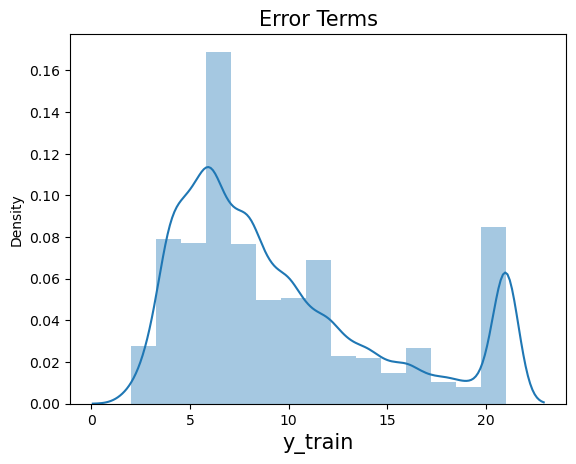

In [61]:
fig = plt.figure()
sns.distplot(y_train, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train', fontsize = 15)
plt.show()